# EDA UK cars

**Loss in value**
- compare cars within a car class (e.g. small car from all makes) - yuliya
- compare models within 1 make - mirza
- uk vs germany - alex

In [92]:
# import pandas, numpy, datetime module
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from datetime import datetime, date, time, timedelta

import datetime
import time
import re

# import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import formattings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

RSEED = 3

# Setting plt style
plt.style.use('fivethirtyeight')

# set color theme
sns_colors = ["#FF6D43", "#00135D", '#00135D', '#00135D']
sns.set_palette(sns.color_palette(sns_colors))

primary = '#FF6D43'
secondary = '#00135D'

# set color theme
sns_colors = ["#FF6D43", "#00135D", '#FF9C36', '#1D8DB3']
sns.set_palette(sns.color_palette(sns_colors))

In [93]:
sns.set_style("whitegrid",
            {"grid.color": "#EBEBEB",
            "grid.linestyle": ":",
             
            'axes.facecolor': 'white',
            'axes.edgecolor': '#00135D',
             
            'text.color': '#00135D',
            'xtick.color': '#212121',
            'ytick.color': '#212121',
             
            'axes.grid': True,
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'axes.spines.right': False,
            'axes.spines.top': False,
             
            'xtick.bottom': True,
            'xtick.top': False,
            'ytick.left': True,
            'ytick.right': False})

### import the data for uk cars

In [94]:
df = pd.read_csv('../data/allcars_uk.csv')

### rename the column "europrice" to "price" according to the data of german cars

In [95]:
df = df.rename(columns={'europrice': 'price'})

### import the data for german cars

In [96]:
german = pd.read_csv('../data/df_ml.csv')

### add the column "car" existing of "make" and "model"

In [97]:
df["car"] = df["make"] + ' ' + df["model"]

In [98]:
german["car"] = german["make"] + ' ' + german["model"]

# Histogramm plot

### histplot for prices uk

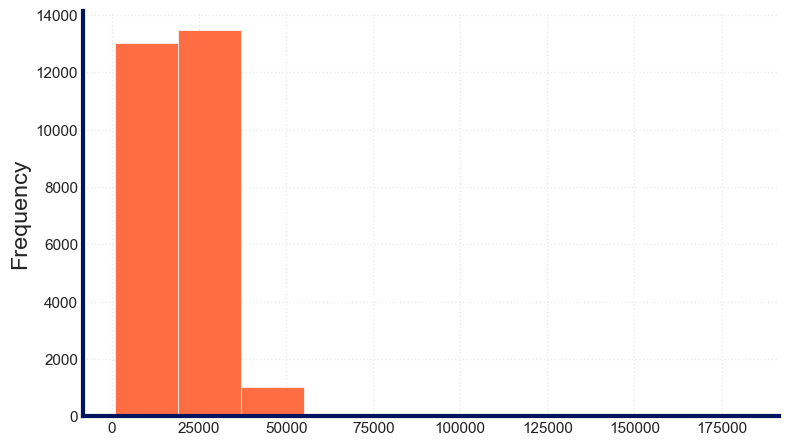

In [99]:
# histplot
df['price'].plot(kind='hist',);

### hisplot of prices germany

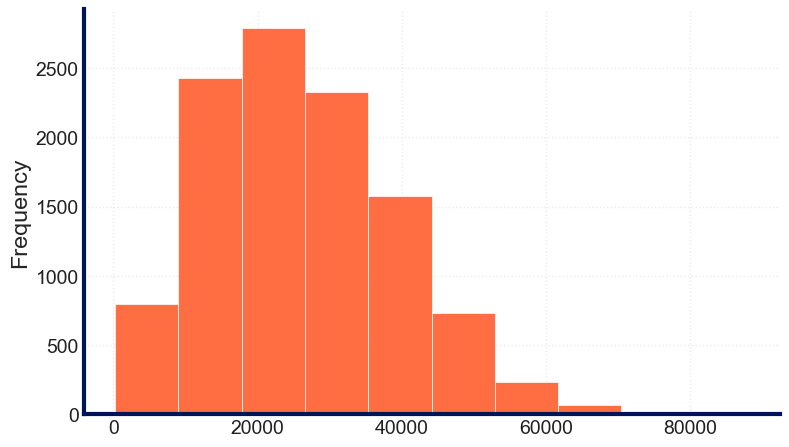

In [31]:
# histplot
german['price'].plot(kind='hist',);

### histplot permission, uk

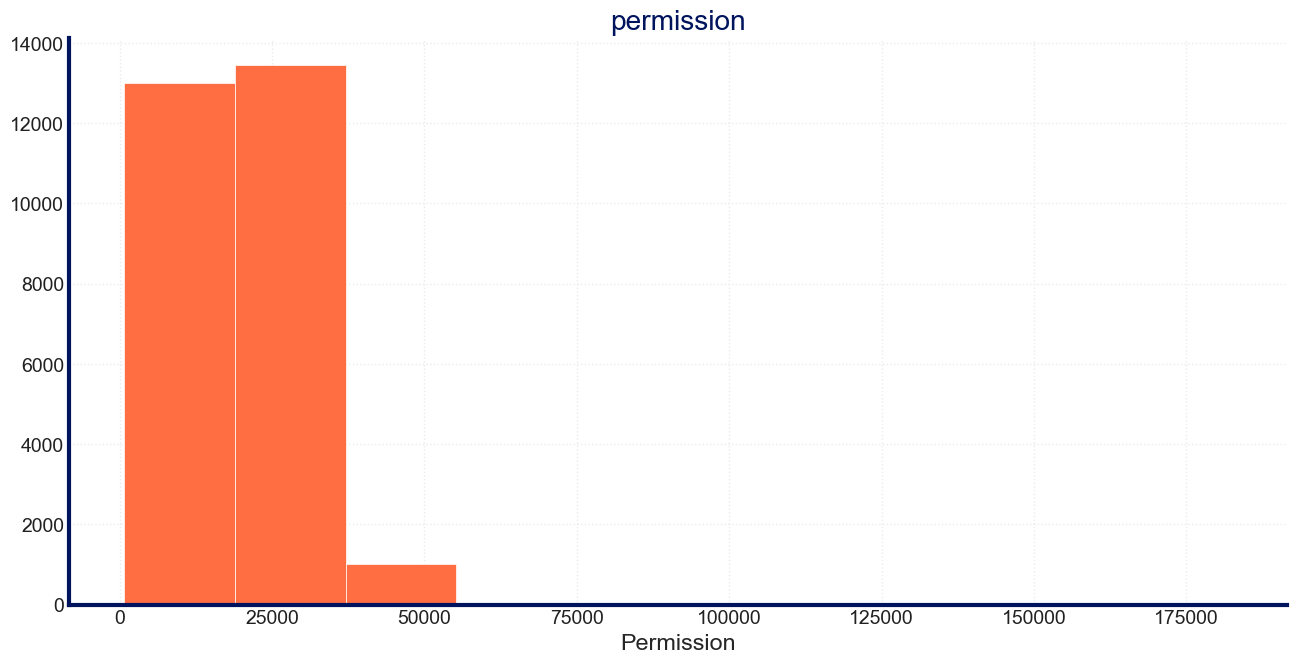

In [32]:
plt.figure(figsize=(14,7))
df.price.hist() 
plt.title("permission")
plt.xlabel('Permission')
plt.show()

### histplot permission, german

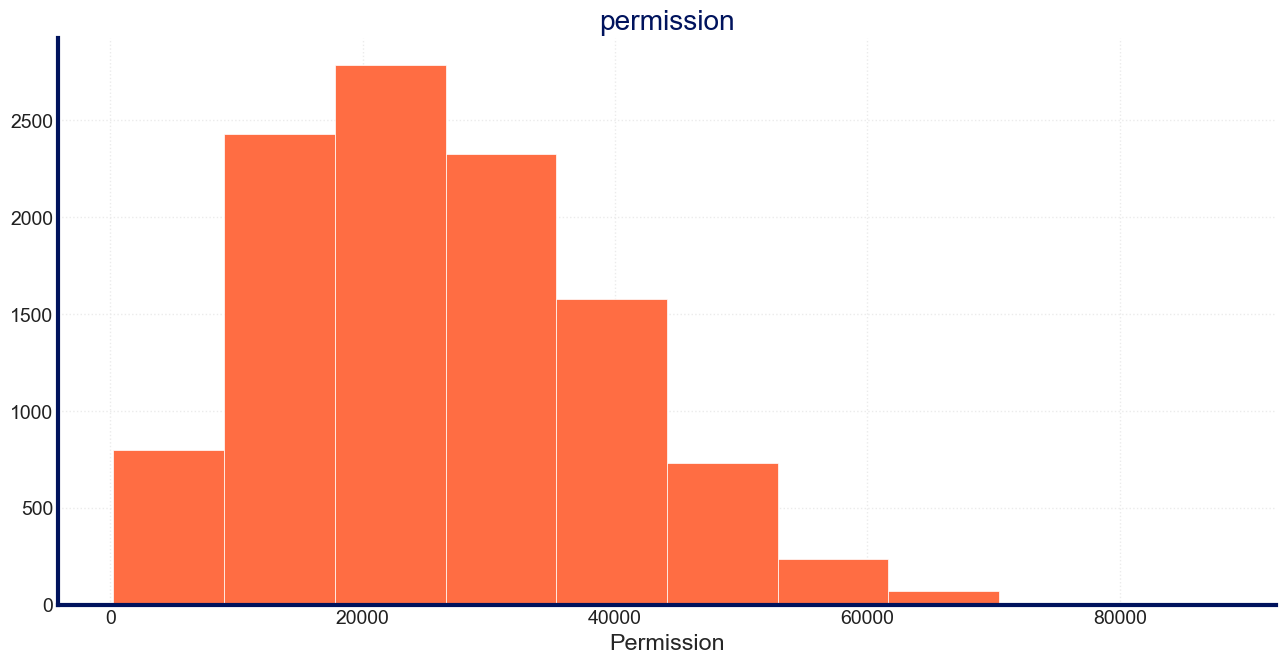

In [33]:
plt.figure(figsize=(14,7))
german.price.hist() 
plt.title("permission")
plt.xlabel('Permission')
plt.show()

### histplot of all numerical datas of uk cars

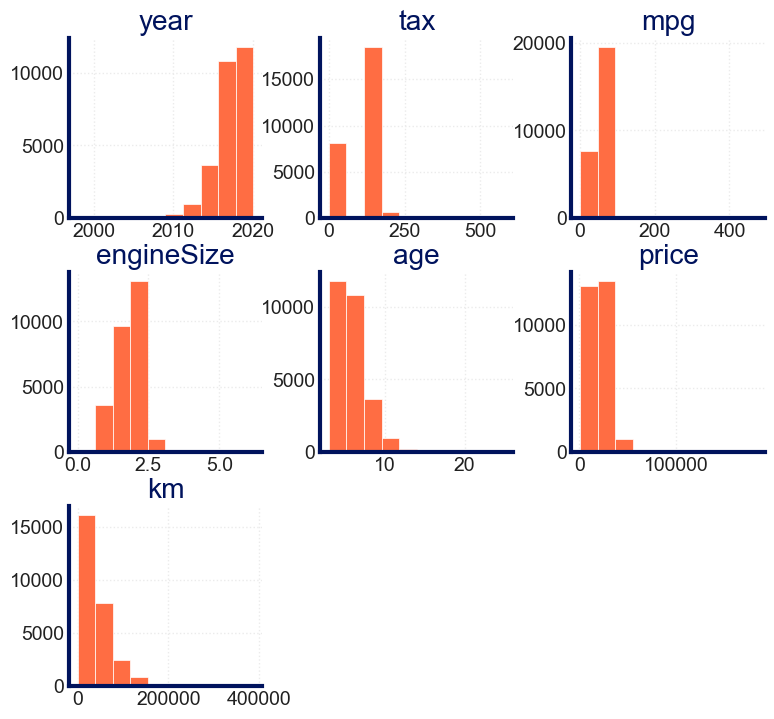

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

### histplot of all numerical datas for german cars

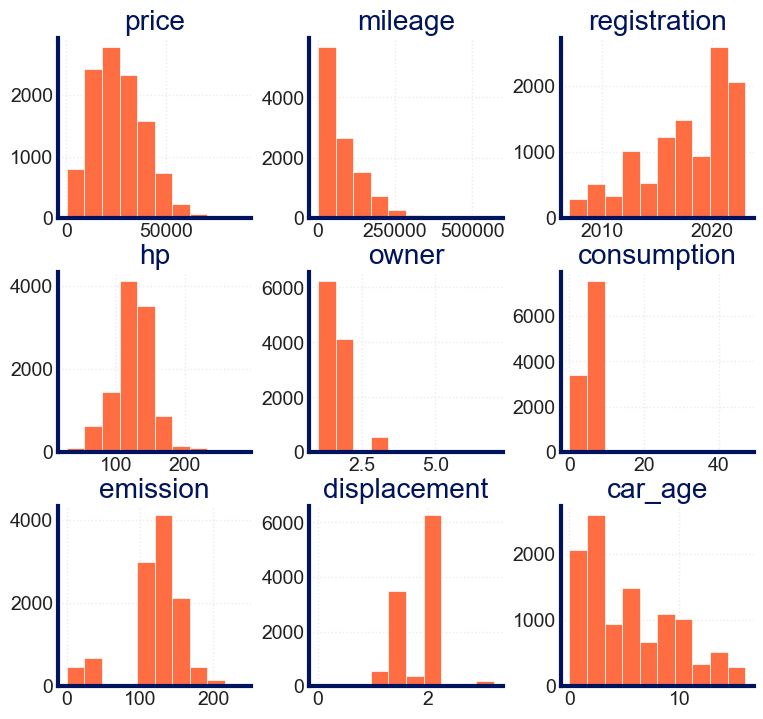

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
german.hist(ax = ax);

# Scatter plot

### scatter price to year uk

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


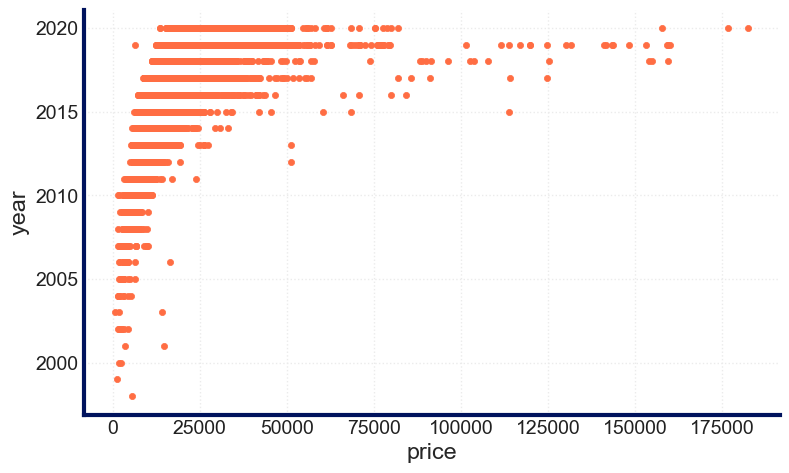

In [37]:
# scatter
df.plot(kind='scatter', x='price', y='year');

### scatter price to registration year, germany

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


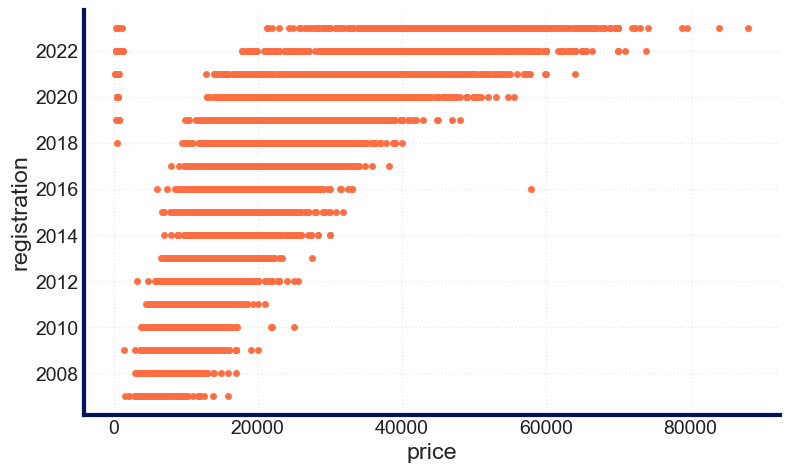

In [38]:
# scatter
german.plot(kind='scatter', x='price', y='registration');

### scatter uk cars price according to classes

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


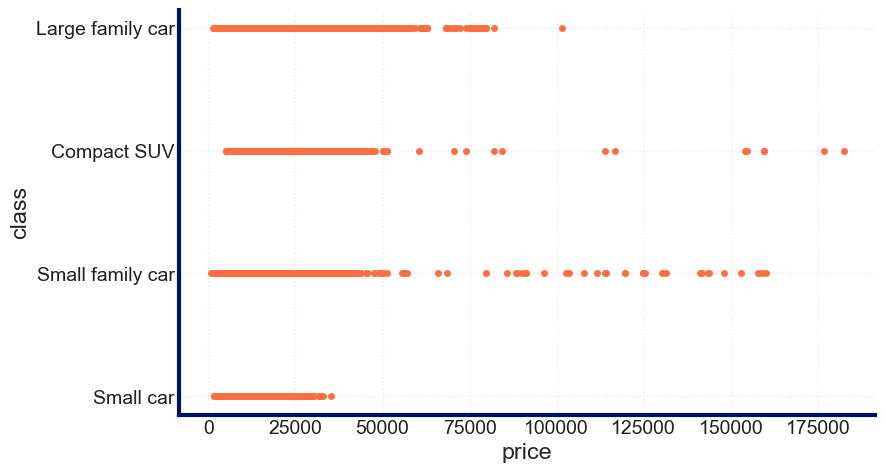

In [39]:
df.plot(kind='scatter', x='price', y='class');

### scatter german cars price according to class

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


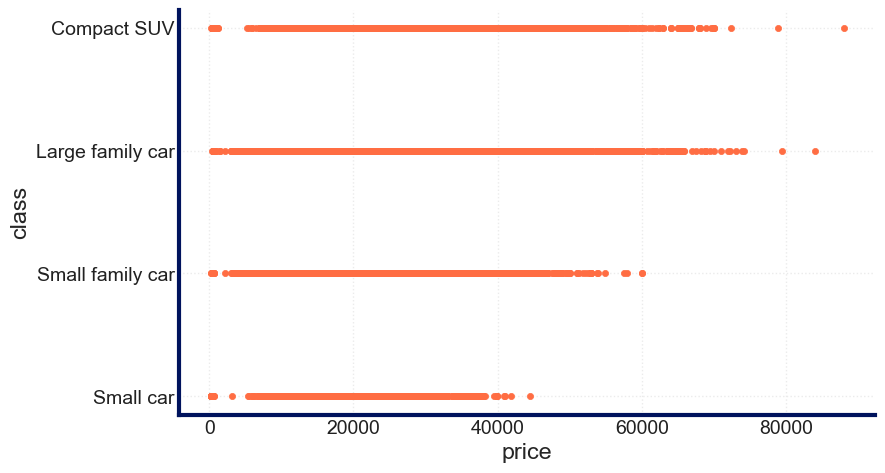

In [41]:
german.plot(kind='scatter', x='price', y='class');

### scatter uk cars price according to car

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


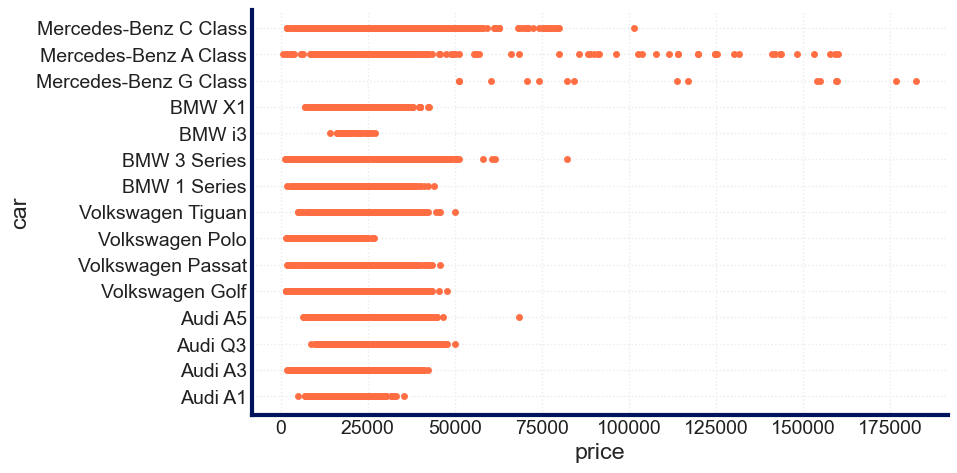

In [40]:
df.plot(kind='scatter', x='price', y='car');

### scatter german cars price according to car

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


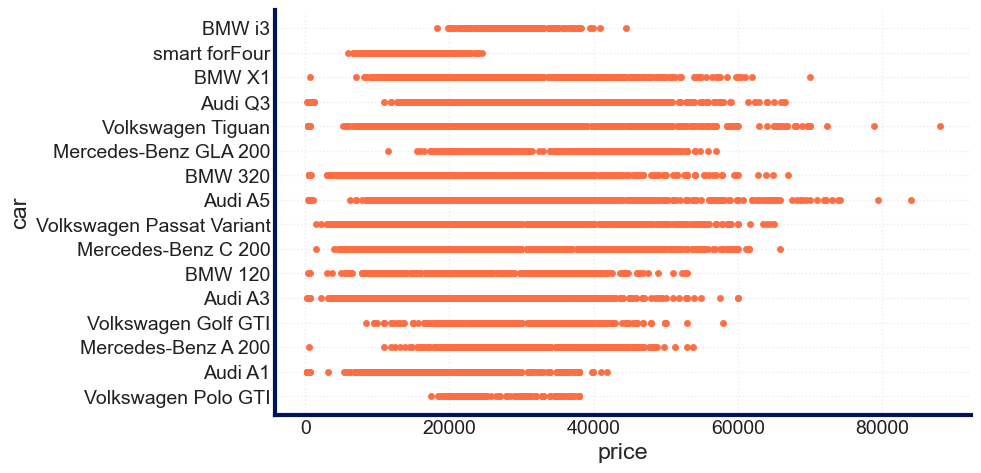

In [43]:
german.plot(kind='scatter', x='price', y='car');

# Catplot

### catplot price uk 

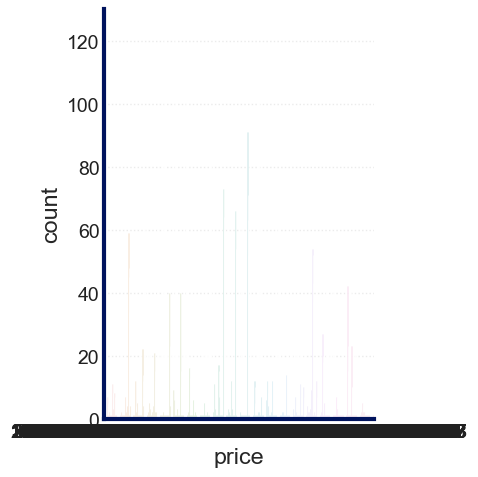

In [44]:
sns.catplot(x="price", kind="count", data=df);

### catplot price german

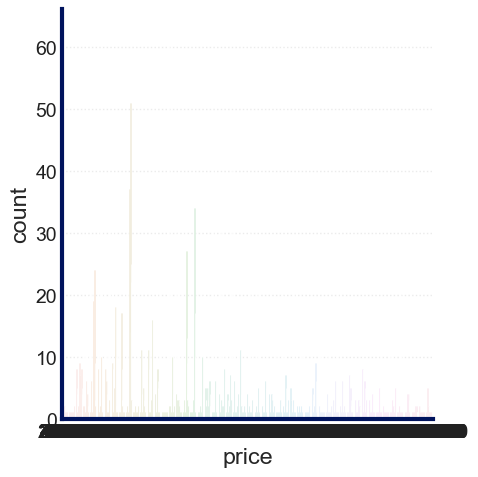

In [45]:
sns.catplot(x="price", kind="count", data=german);

### catplot model, uk

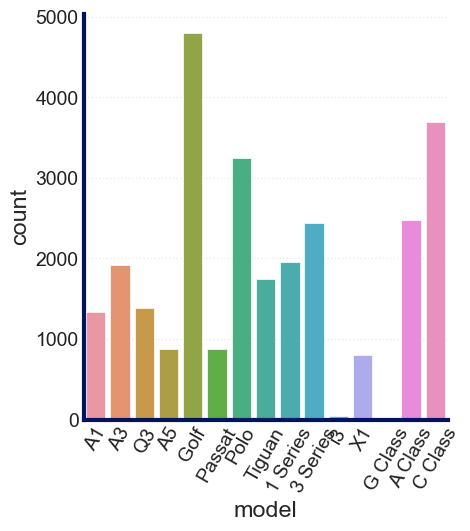

In [52]:
sns.catplot(x="model", kind="count", data=df)
plt.xticks(rotation=60);

### catplot model, german

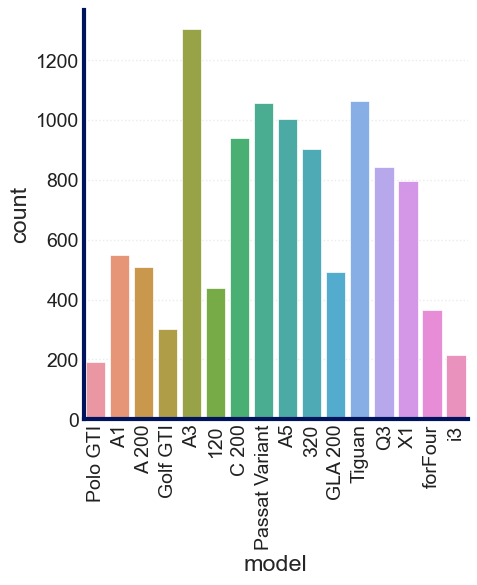

In [55]:
sns.catplot(x="model", kind="count", data=german)
plt.xticks(rotation=90);

 ## catplot with 2 plots, uk and german

### price vs. first registration

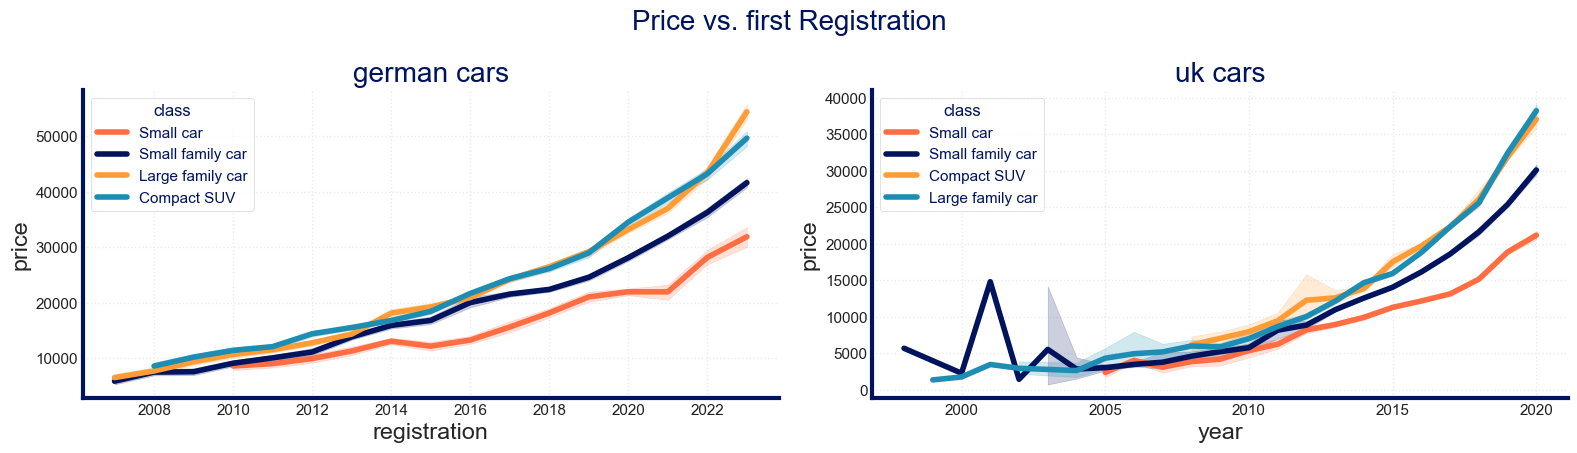

In [104]:
plt.figure(figsize=(16,8))
plt.suptitle('Price vs. first Registration', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="registration", y="price",  data=german, hue="class");
plt.title('german cars')

plt.subplot(2, 2, 2)  
sns.lineplot(x="year", y="price",  data=df, hue="class");
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

### price vs. km

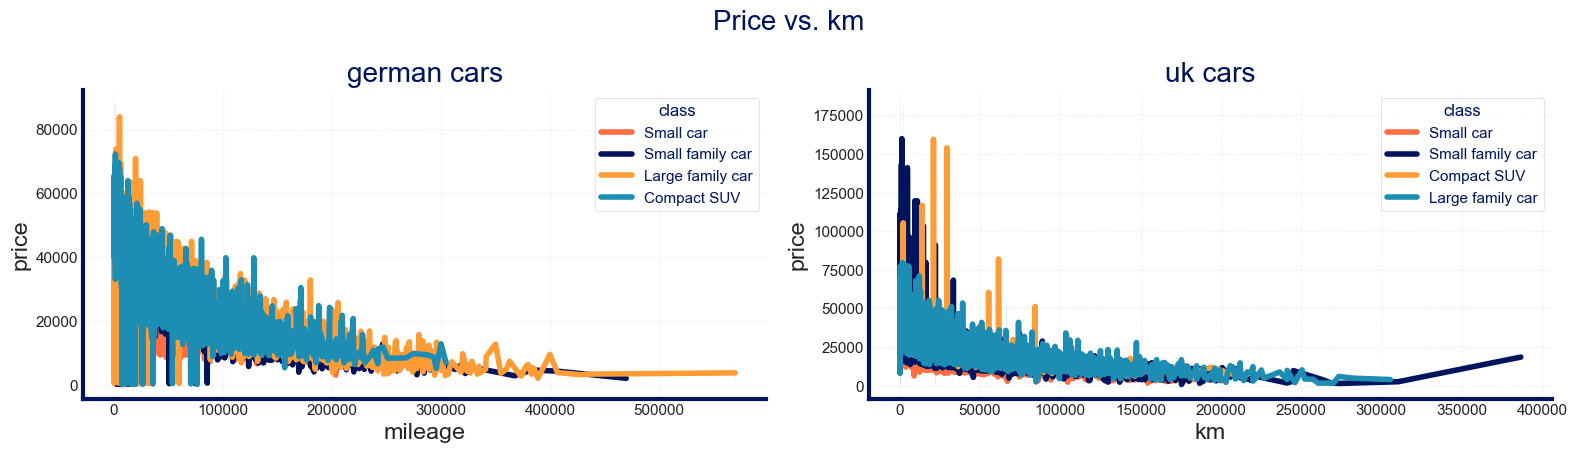

In [106]:
plt.figure(figsize=(16,8))
plt.suptitle('Price vs. km', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="mileage", y="price",  data=german, hue="class");
plt.title('german cars')

plt.subplot(2, 2, 2)  
sns.lineplot(x="km", y="price",  data=df, hue="class");
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

### price vs. age

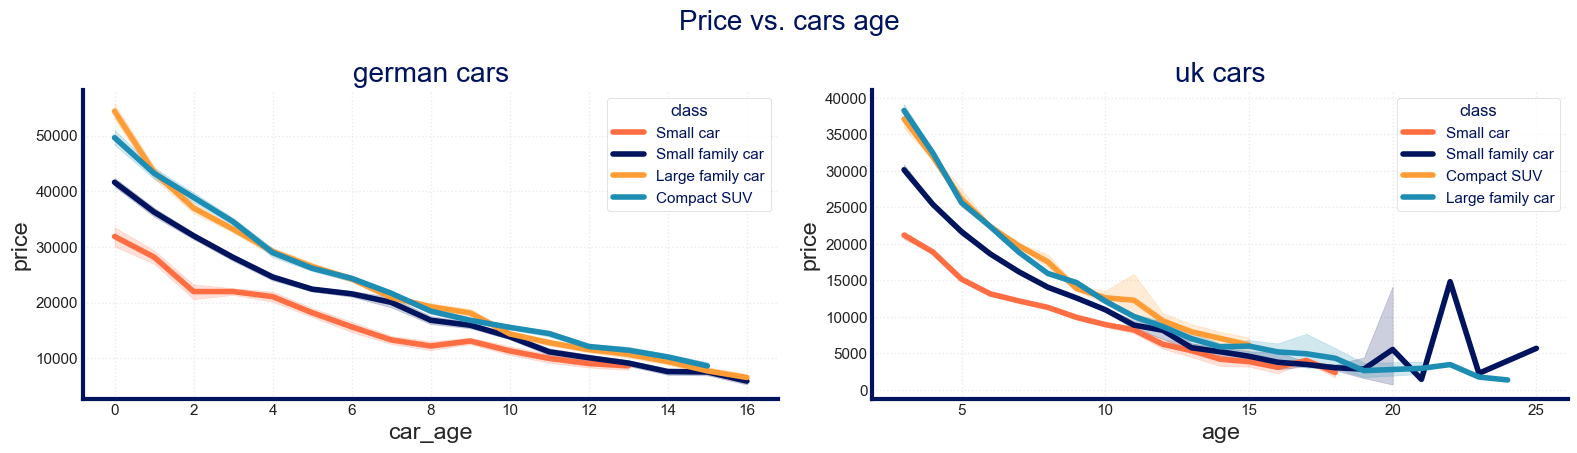

In [108]:
plt.figure(figsize=(16,8))
plt.suptitle('Price vs. cars age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(x="car_age", y="price",  data=german, hue="class");
plt.title('german cars')

plt.subplot(2, 2, 2)  
sns.lineplot(x="age", y="price",  data=df, hue="class");
plt.title('uk cars')

plt.subplots_adjust(top=0.85)
plt.tight_layout();

### catplot model and make, uk

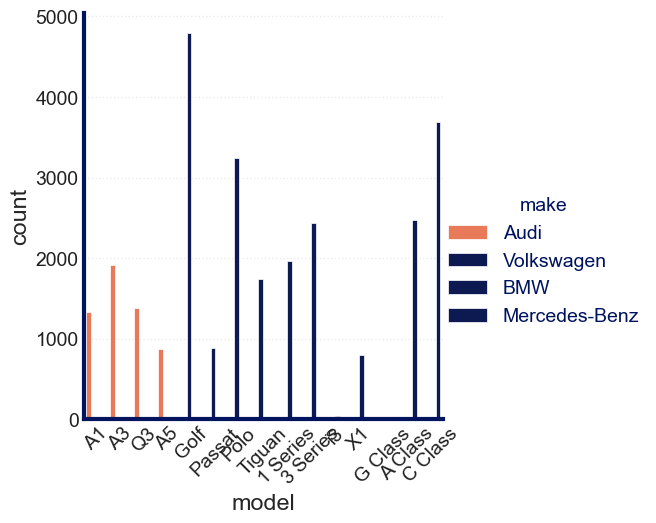

In [56]:
sns.catplot(data=df, kind='count', x='model', hue='make')
plt.xticks(rotation=45);

### catplot model and make, german

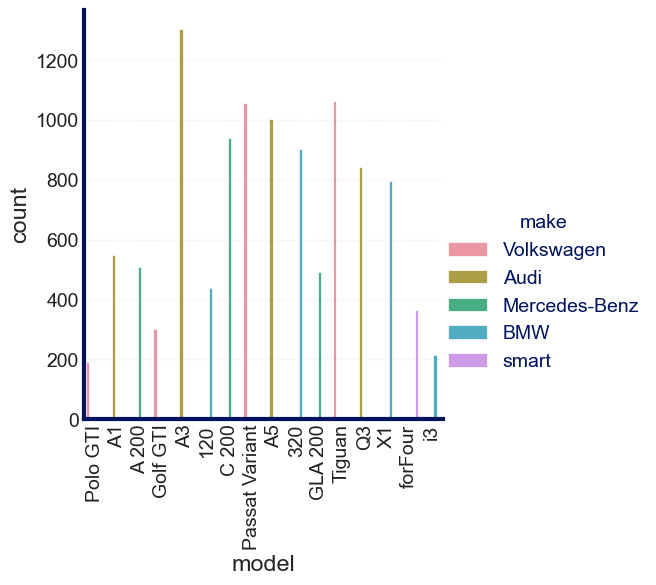

In [58]:
sns.catplot(data=german, kind='count', x='model', hue='make')
plt.xticks(rotation=90);

### catplot transmission, uk

Text(0.5, 1.0, 'Transmission')

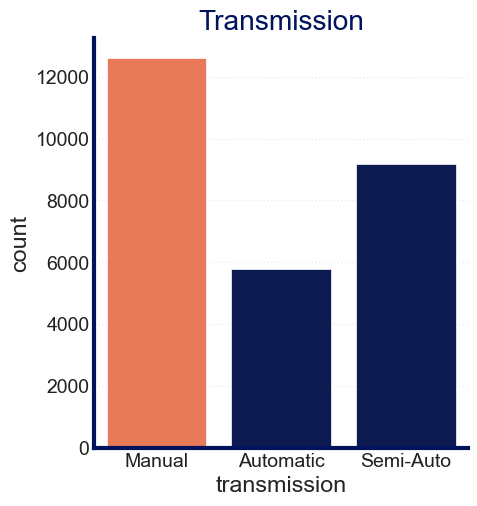

In [59]:
sns.catplot(x="transmission", kind="count", data=df)
plt.title("Transmission")

### catplot transmission, german

Text(0.5, 1.0, 'Transmission')

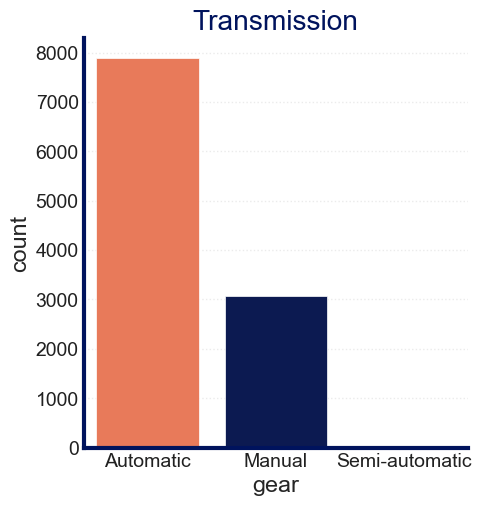

In [63]:
sns.catplot(x="gear", kind="count", data=german)
plt.title("Transmission")

### catplot transmission and model, uk

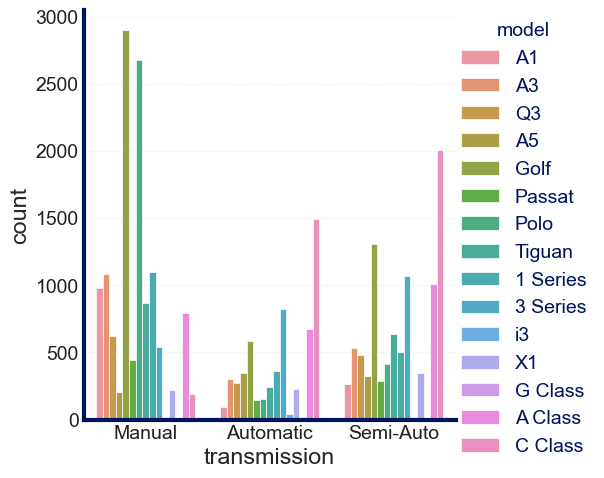

In [64]:
sns.catplot(data=df,kind='count',x='transmission',hue='model')

### catplot transmission and model, german

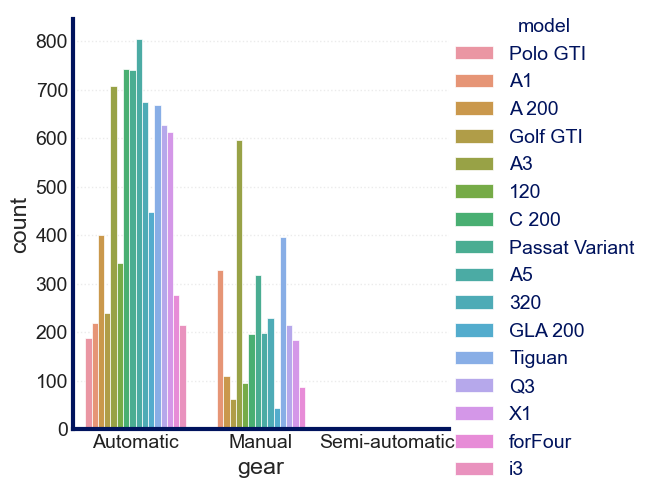

In [66]:
sns.catplot(data=german,kind='count',x='gear',hue='model')

# Pairplot

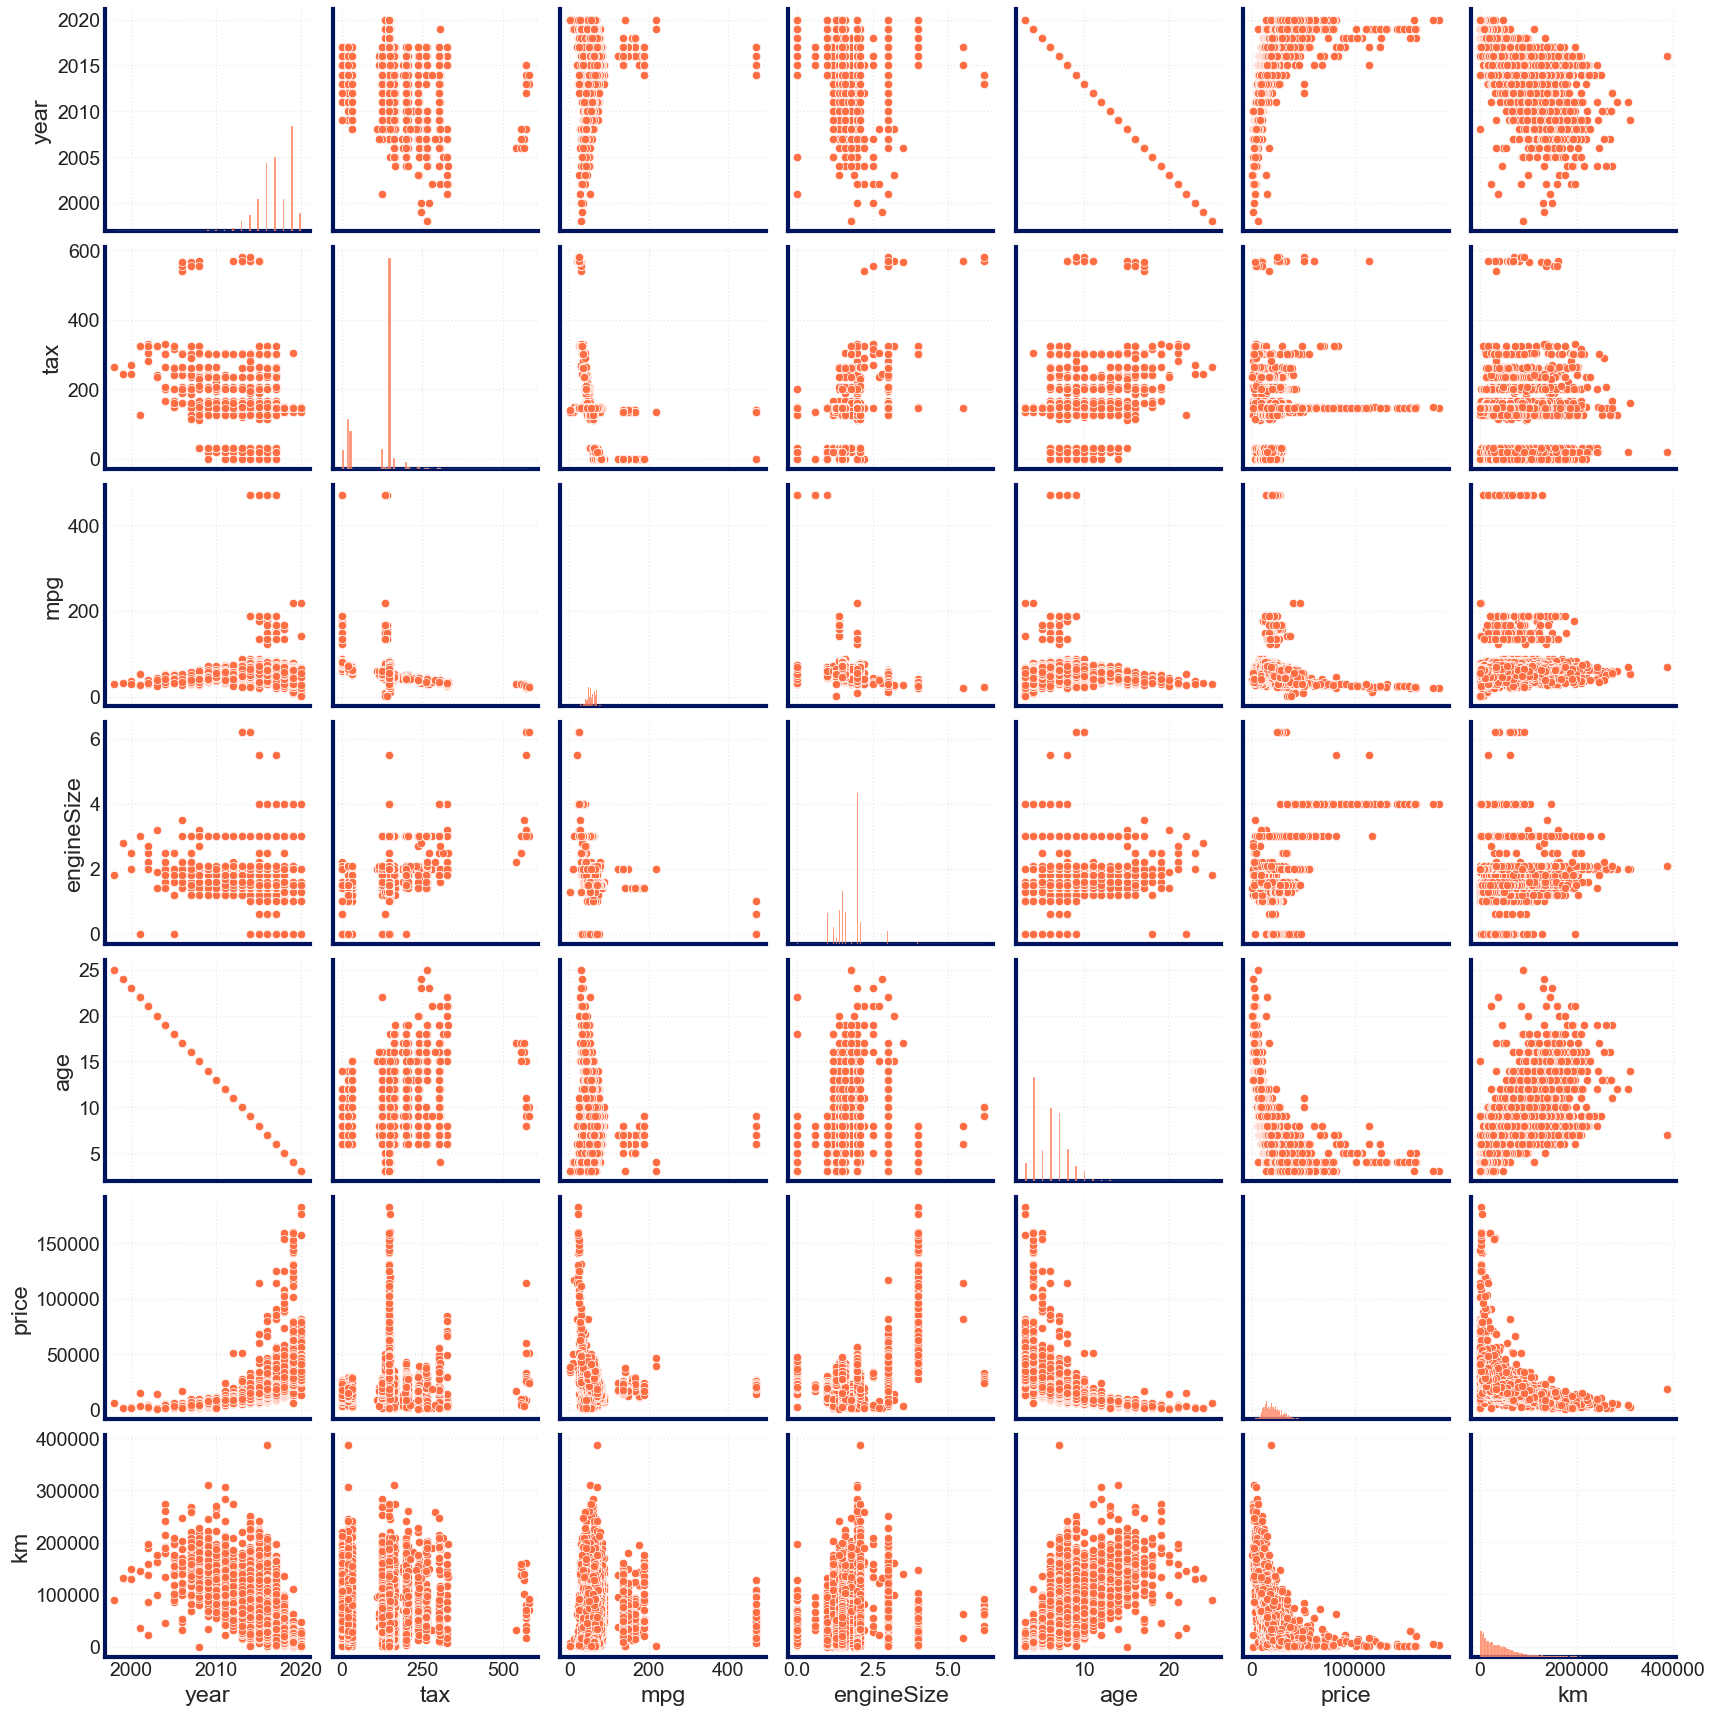

In [68]:
sns.pairplot(df);

### pairplot german

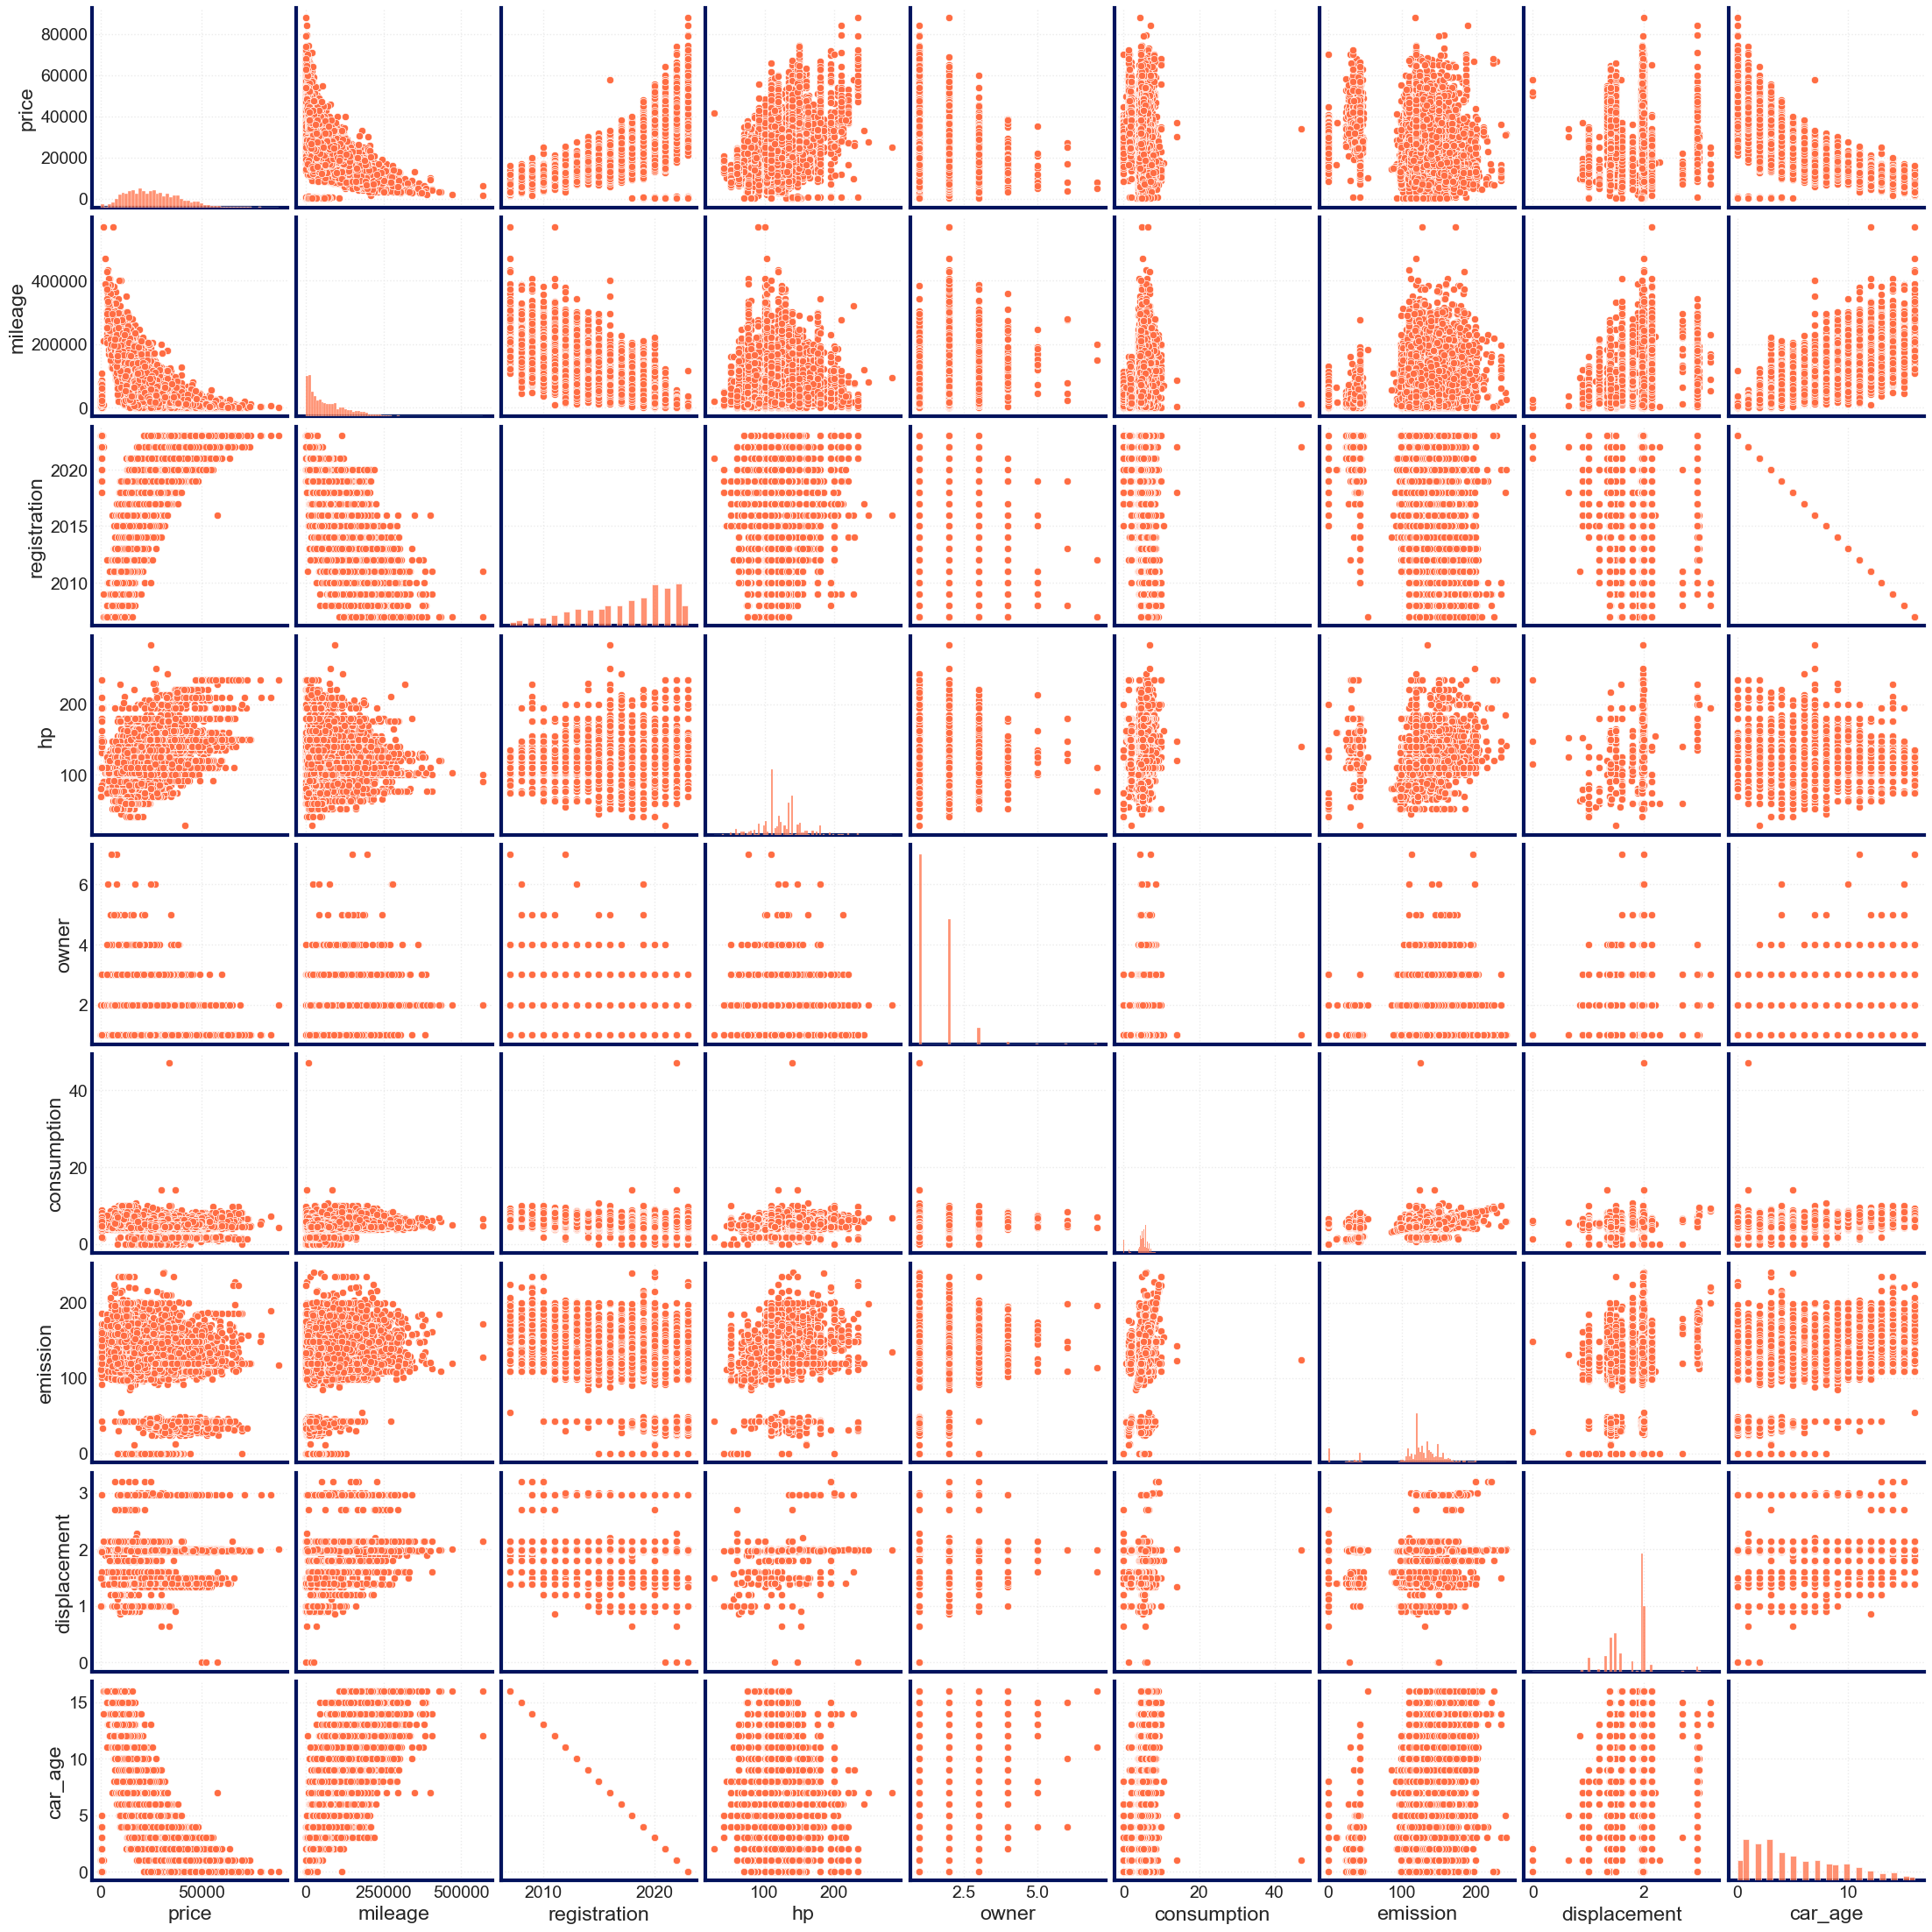

In [67]:
sns.pairplot(german);

# Barplot

### barplot model and price, uk

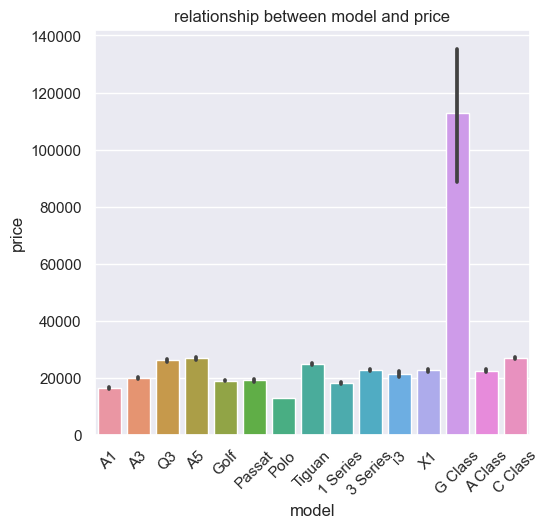

In [69]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'model',y = 'price',data = df)
plt.title('relationship between model and price')
plt.xticks(rotation=45);

### barplot price and model, german

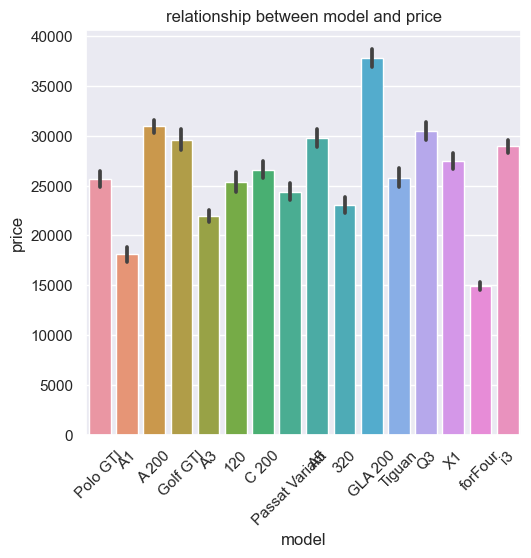

In [70]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'model',y = 'price',data = german)
plt.title('relationship between model and price')
plt.xticks(rotation=45);

### barplot price and class, uk

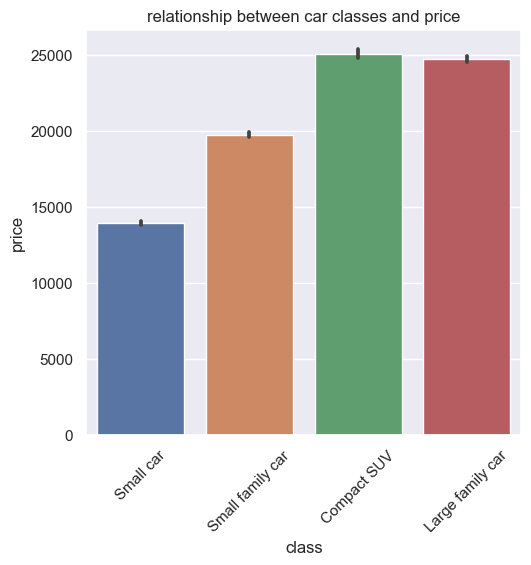

In [71]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'class',y = 'price',data = df)
plt.title('relationship between car classes and price')
plt.xticks(rotation=45);

### barplot price and class, german

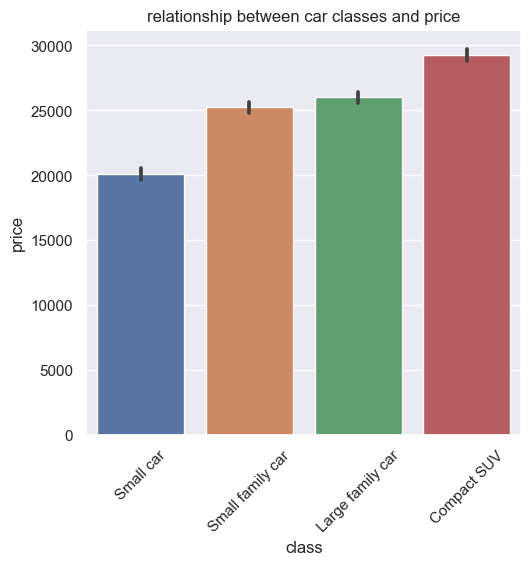

In [72]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'class',y = 'price',data = german)
plt.title('relationship between car classes and price')
plt.xticks(rotation=45);

### the count of the model, uk

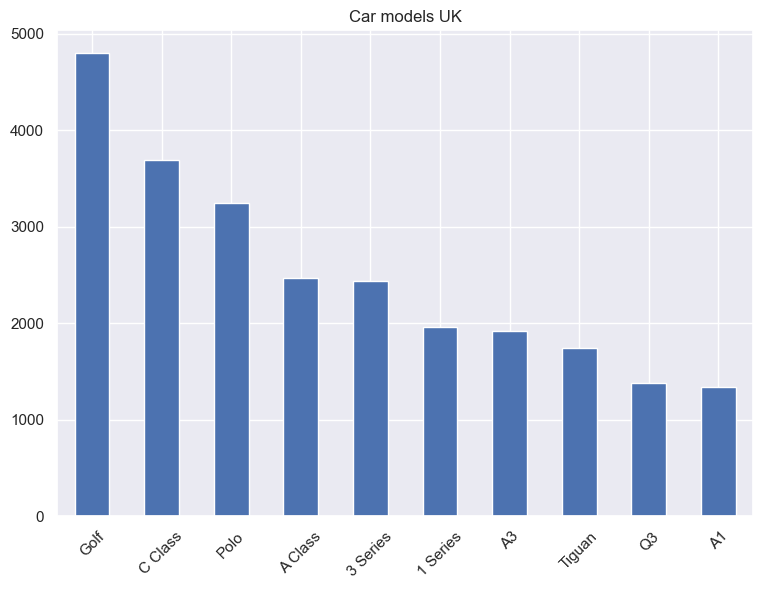

In [76]:
L = df['model'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Car models UK')
plt.xticks(rotation=45);

### the counting of model, german

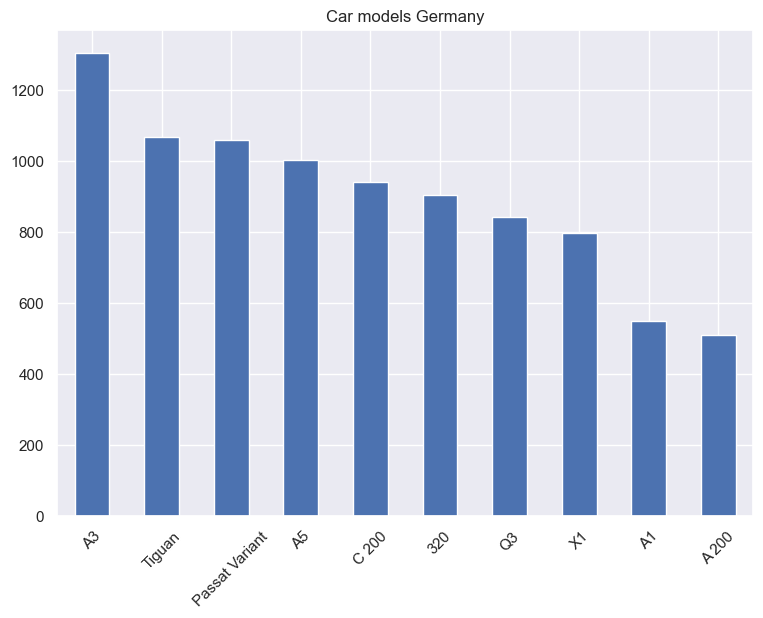

In [75]:
L = german['model'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Car models Germany')
plt.xticks(rotation=45);

### the counting of age, uk

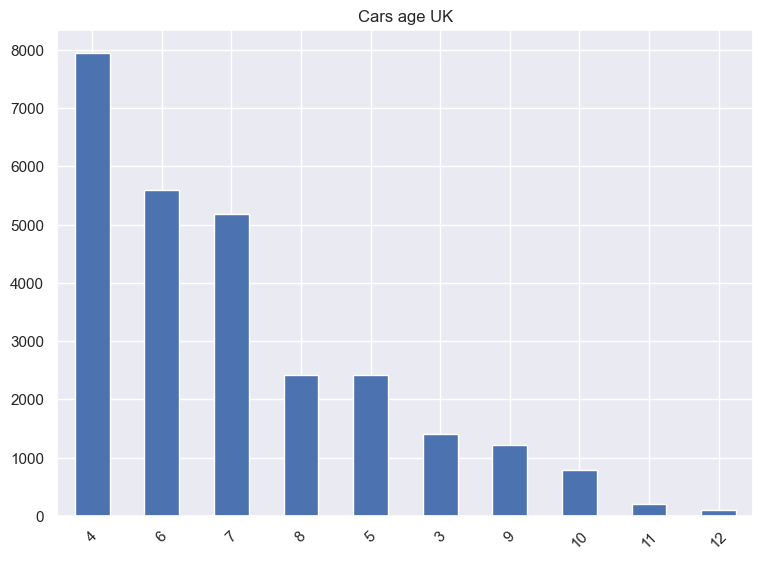

In [77]:
L = df['age'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Cars age UK')
plt.xticks(rotation=45);

In [78]:
### the counting of age, german

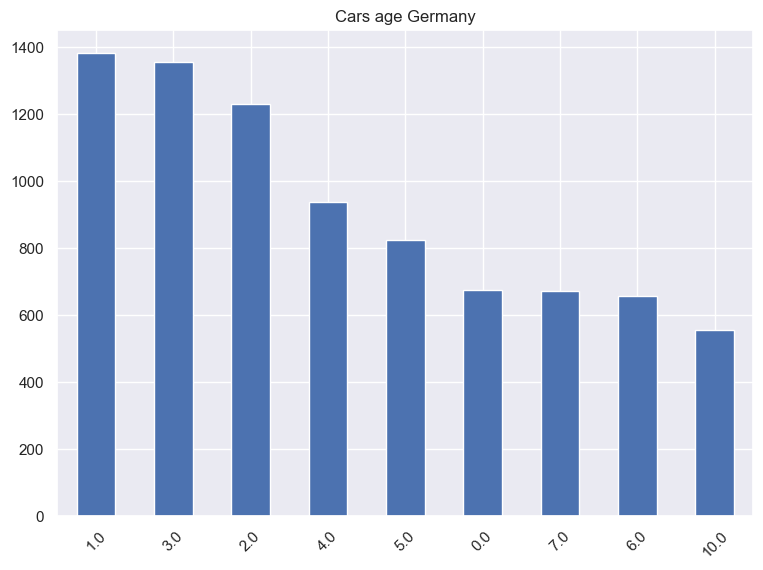

In [80]:
L = german['car_age'].value_counts()[:10]
L.plot(kind = 'bar',figsize=(8,6))
plt.title('Cars age Germany')
plt.xticks(rotation=45);

# Hextagram

### hexbin age and price uk

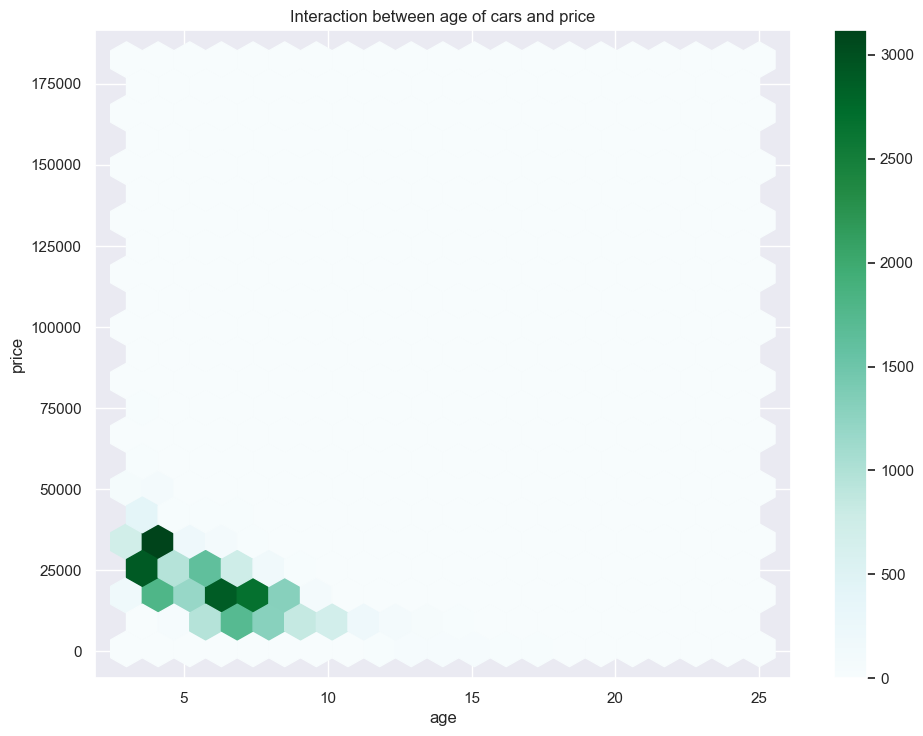

In [81]:
df.plot.hexbin(x='age', y='price', gridsize=20, figsize=(10,8))
plt.title('Interaction between age of cars and price');

### hexbin age and price, german

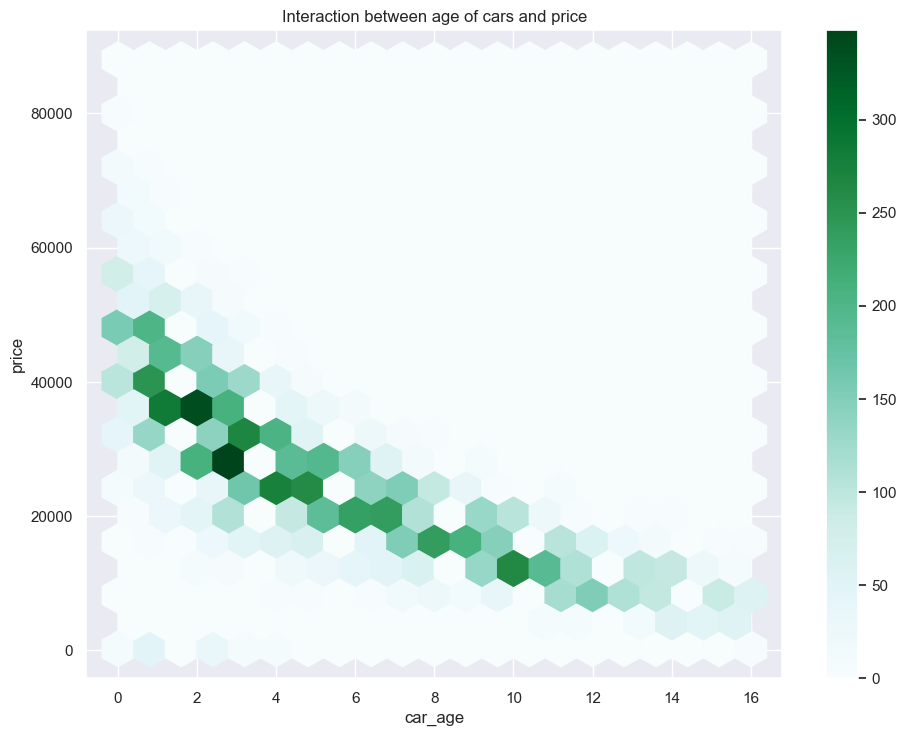

In [82]:
german.plot.hexbin(x='car_age', y='price', gridsize=20, figsize=(10,8))
plt.title('Interaction between age of cars and price');

# Correlation matrix 

### uk cars

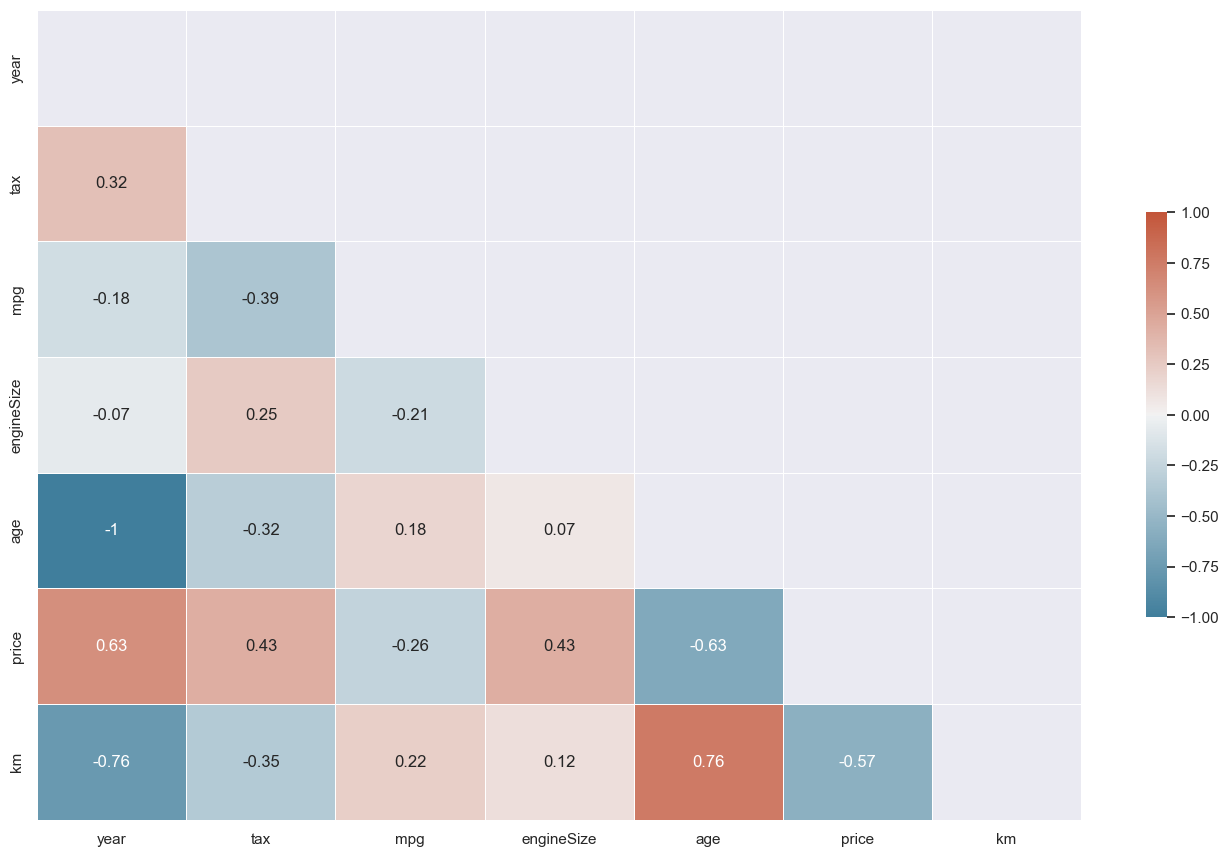

In [83]:
# Compute the correlation matrix
corr = df.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5});

### german cars

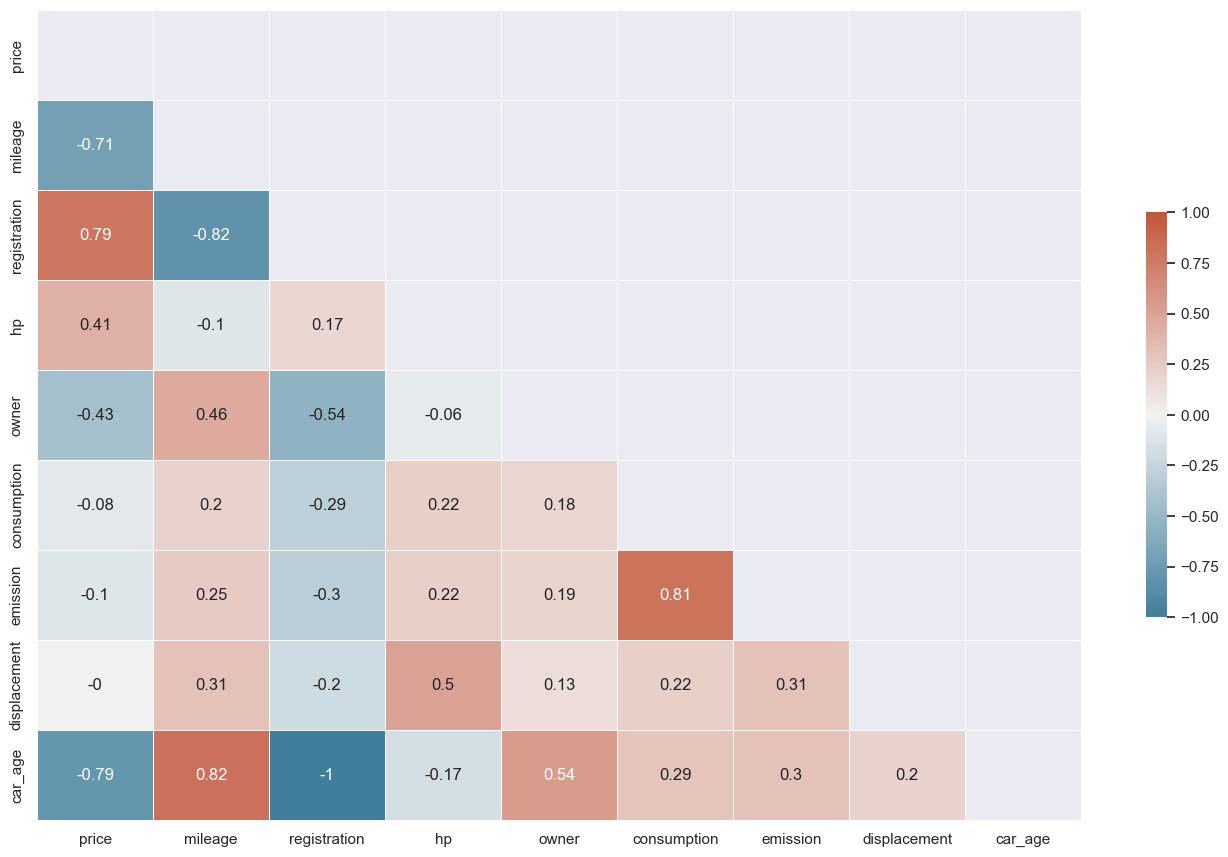

In [84]:
# Compute the correlation matrix
corr = german.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5});

### relplot price and age, uk

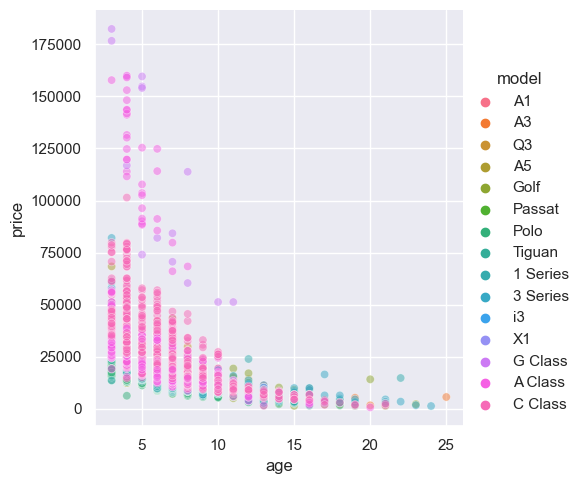

In [85]:
sns.relplot(y=df['price'], x=df['age'], hue=df['model'], alpha=0.5);

### relplot price and age, german

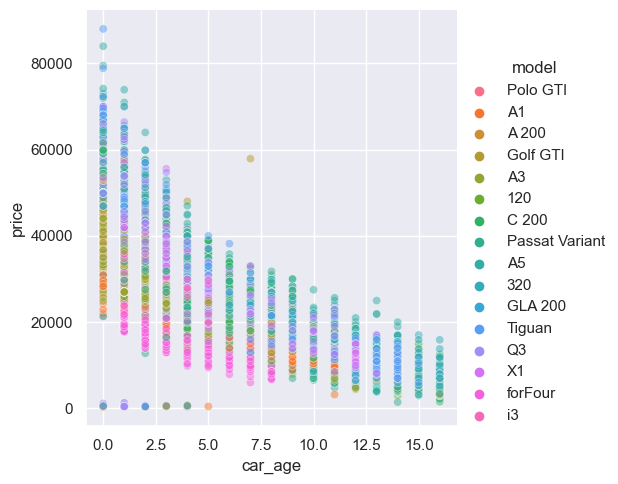

In [87]:
sns.relplot(y=german['price'], x=german['car_age'], hue=german['model'], alpha=0.5);

### catplot not ready yet.

In [ ]:
fig = sns.catplot(x='location_type', hue='bank_account', data=train, kind='count', height=6, aspect=0.7, palette=['tomato','lightgreen'])
fig.fig.suptitle('Positive & Negative Bank Accounts By Location Types')
fig.set_xlabels('Location Type')
fig.set_ylabels('Numb. People')
fig